# <center> Econ 373: Computational Economics (with Python) </center>
## <center> Homework 5 (individual) </center>

# <font color='red'>Name:</font>

# <font color='red'>Instructions:</font>
- Save all of your code to a .ipynb file (jupyter notebook file) and name it as **username_hw5.ipynb**. 
    - **You should remove any test cells/code that is outside of functions.**
    - Submit only username_hw5.ipynb file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    

## Grading

- We will run your file by clicking Kernel--> Restart and Run All. You file should be able to reproduce all the results stored in your jupyter file. 

- We may also run your code by specifying q#(arg) in an empty cell. It should reproduce your stored results. 

Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [11]:
import pandas as pd
import datetime
import os
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 

In [12]:
import os
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd
# for example: %cd "C:\Users\\Purdue\ComputationalEconomicsECON320\Week3_4\Group\"
# Define your data folder here:
datafolder = "C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\hw05\\HW5_Data\\"
# Please use an absolute path
outputfolder= "C:\\Users\\xinxi\\Dropbox\\Fall 2021\\03-hw\\hw05\\HW5_Output\\"

# Question 1

Write a function called **q1** to plot the number of banks in the continental US between 1934 and 2018. 

- **Input**: none
- **Output**:  a pdf figure saved to file username_hw5_q1.pdf (saved to the output folder)
    - Make sure that your graph contains axis labels.
    
*Hint: This question uses data from Question 3 on HW3. You may use the function that you have created at that time to do the relevant calculations (you can also use the function from the solutions)*

*Make sure that hw3_data2.zip is in the data folder*

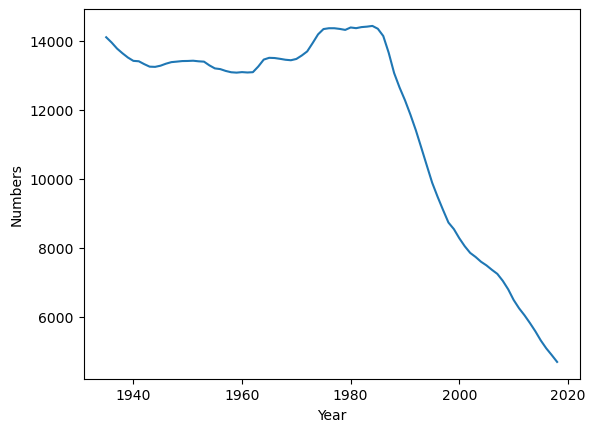

In [57]:

#Starting point
def q1():
    
    f, ax = plt.subplots()  
    shutil.unpack_archive('hw3_data2.zip','extracted_data')
    
    #list of all states in the the continental US
    cont_us=['Alabama','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Idaho',\
             'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan',\
             'Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',\
             'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania',\
             'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia',\
             'Washington','West Virginia','Wisconsin','Wyoming']
    
    cont_us_files = [state + '.csv' for state in cont_us]
    bank_count_per_year = {}  

    for state_file in cont_us_files: 
        filepath = os.path.join('extracted_data', state_file)
        df = pd.read_csv(filepath)
        
        for index, row in df.iterrows():
            year = row['YEAR']
            bank_count = row['TOTAL']  
            
            if year in bank_count_per_year:
                bank_count_per_year[year] += bank_count
            else:
                bank_count_per_year[year] = bank_count
    
    
    sorted_bank_count = sorted(bank_count_per_year.items())
    years = [item[0] for item in sorted_bank_count]
    counts = [item[1] for item in sorted_bank_count]
    
    
    plt.plot(years,counts)
    plt.xlabel('Year')
    plt.ylabel('Numbers')
    

      
    outputfolder = './output/'  
    
    
    if not os.path.exists(outputfolder):
        os.makedirs(outputfolder)
    
    outputfolder = './output/'  
    f.savefig(outputfolder + 'Yuanhang Peng_hw5_q1.pdf')  

q1()


# Question 2
Write a function called **q2** to plot the timeseries of monthly unemployment rate with the months of economic recessions shaded in gray. Restrict your plot to 1950 until now and use data on the recession indicator as determined by NBER (available in the separate file USREC.csv)

- **Input**: none
- **Output**:  a pdf figure saved to file username_hw5_q2.pdf (saved to the output folder)
    - Make sure that your graph contains axis labels, legend, and source of data

*Make sure "UNRATE.csv" and "USREC.csv" are in the data folder.


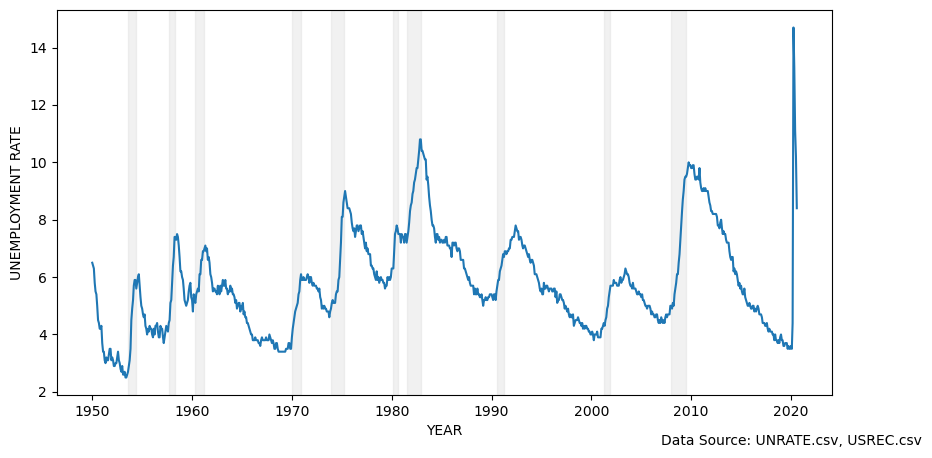

In [63]:
def q2():
       
    unrate = pd.read_csv('UNRATE.csv')
    usrec = pd.read_csv('USREC.csv')
    
    unrate['DATE'] = pd.to_datetime(unrate['DATE'])
    usrec['DATE'] = pd.to_datetime(usrec['DATE'])
    
    unrate = unrate[unrate['DATE'].dt.year >= 1950]
    usrec = usrec[usrec['DATE'].dt.year >= 1950]
    
    df = pd.merge(unrate, usrec, on='DATE')
    df.set_index('DATE', inplace=True)
    
    fig,ax = plt.subplots(figsize=(10,5))
    ax.plot(df.index, df['UNRATE'], label='Unemployment Rate')
    
    recession_start = None
    for date, rec in df['USREC'].items():
        if rec == 1 and recession_start is None:
            recession_start = date
        elif rec == 0 and recession_start is not None:
            ax.axvspan(recession_start, date, color='lightgray', alpha=0.3, label='Recession')
            recession_start = None
    
    plt.xlabel('YEAR')
    plt.ylabel('Unemployment rate'.upper())
    plt.figtext(0.99, 0.01, 'Data Source: UNRATE.csv, USREC.csv', horizontalalignment='right')  
    
    outputfolder = 'hw5_q2_output/'
    if not os.path.exists(outputfolder):
        os.makedirs(outputfolder)
        
    fig.savefig(outputfolder + 'Yuanhang Peng_hw5_q2.pdf')
    plt.show()

    
q2()
    
     #When saving the file to pdf assume that the 'hw5_q2_output' folder already exists


# Question 3
Write a function called **q3** to plot the GDP per capita across all of the OECD countries between 1961 and 2018. 

- **Input**: none
- **Output**: a pdf figure saved to file username_hw5_q3.pdf (saved to the output folder)
    - Make sure your graph contains axis labels.

*Hints: The plot should be for the aggregate average across all countries, not individual countries.*

*Make sure 'gdppercapita.csv' is in the data folder.

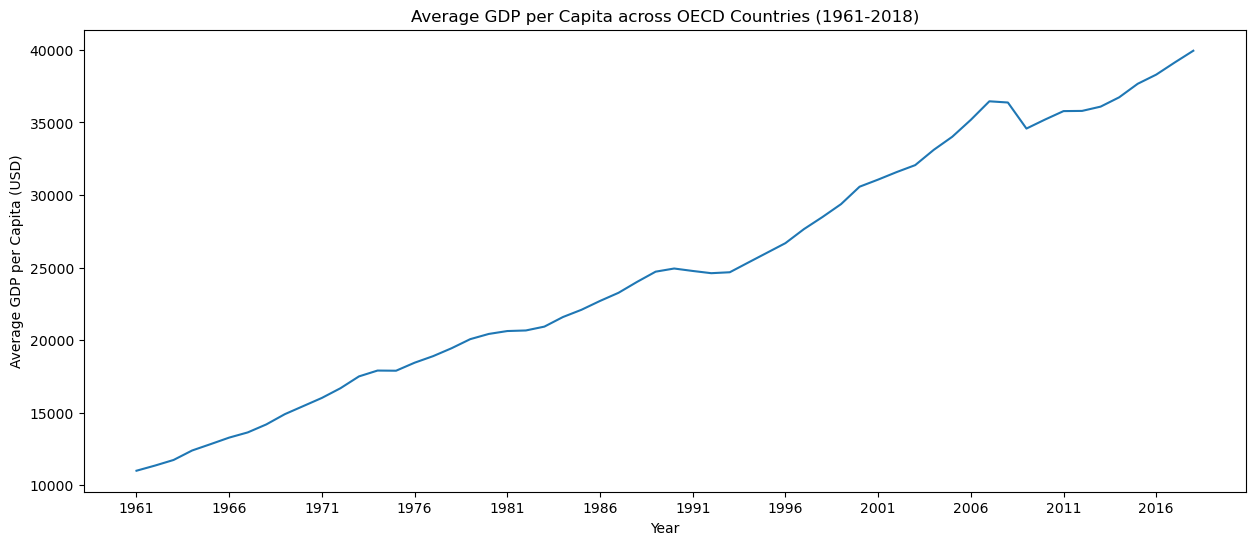

In [24]:
def q3():
    # oecd countries and their joining year
    oecd={'country':['Australia','Austria', 'Belgium', 'Canada','Chile','Colombia','Czech Republic','Denmark', 'Estonia',\
                     'Finland', 'France', 'Germany', 'Greece', 'Hungary','Iceland','Ireland','Israel','Italy', 'Japan', \
                     'South Korea','Latvia', 'Lithuania','Luxembourg', 'Mexico', 'Netherlands','New Zealand','Norway','Poland',\
                     'Portugal','Slovak Republic','Slovenia','Spain','Sweden','Switzerland','Turkey', 'United Kingdom','United States'],\
          'join_year':[1971,1961, 1961, 1961,2010,2020,1995,1961, 2010, 1969, 1961, 1961, 1961, 1996,\
            1961,1961,2010,1962, 1964,1996,2016, 2018,1961, 1994, 1961,1973,1961,1996,1961,\
            2000,2010,1961,1961,1961,1961,1961,1961]}
    
    gdppercapita = pd.read_csv('gdppercapita.csv')
    
    oecd_countries = gdppercapita[gdppercapita['country'].isin(oecd['country'])]
    oecd_countries = oecd_countries.loc[:, '1961':'2018']
    
    avg_gdp = oecd_countries.mean()
    
    plt.figure(figsize=(15,6))
    plt.plot(avg_gdp.index, avg_gdp.values)
    plt.xlabel('Year')
    plt.ylabel('Average GDP per Capita (USD)')
    plt.title('Average GDP per Capita across OECD Countries (1961-2018)')
    
    plt.xticks([str(year) for year in range(1961, 2019, 5)])


    # Save the figure to a PDF file
    if not os.path.exists('output'):
        os.makedirs('output')
    plt.savefig('output/username_hw5_q3.pdf')
    plt.show()
    
    
q3()
     #When saving the file to pdf assume that the 'hw5_q3_output' folder already exists